### Import Libraries and Packages

In [46]:
# load necessary libraries
import pandas as pd
from pandas import read_excel
import numpy as np
from collections import Counter
import seaborn as sns

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import matplotlib.pyplot as plt
from matplotlib import pylab
import graphviz 
%matplotlib inline

from pathlib import Path

In [47]:
# import vectorized dataset
X = pd.read_csv("cleaned_total_v2.csv")
X

,ability,able,absolutely,aca,aca marketplace,aca plan,aca pliant,aca subsidy,accept,accept medicaid,...,year ago,year old,year work,year year,yearly,yep,yes,york,young,zero
0,0.0,0.0,0.406282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.184796
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.442149,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
7014,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
7015,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
7016,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


### Mapping Sentiment Scores by Time

In [48]:
df = pd.read_csv('final_data_for_sentiment_analysis_v2.csv')

In [49]:
def categorize_sentiment(score):
    if score == -99:
        return 'Irrelevant'
    elif score == 1:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    elif score == -1:
        return 'Negative'
    else:
        return 'Other'

In [50]:
df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

In [51]:
date_counts = df.groupby('Date').size()
date_counts

Date
2024-11-20    211
2024-11-21    216
2024-11-22    178
2024-11-23    152
2024-11-24    134
2024-11-25    155
2024-11-26    217
2024-11-27    184
2024-11-28    163
2024-11-29    123
2024-11-30    103
2024-12-01    105
2024-12-02    193
2024-12-03    189
2024-12-04    254
2024-12-05    371
2024-12-06    386
2024-12-07    264
2024-12-08    328
2024-12-09    294
2024-12-10    346
2024-12-11    478
2024-12-12    408
2024-12-13    329
2024-12-14    333
2024-12-15    326
2024-12-16    297
2024-12-17    281
dtype: int64

### Temporal Analysis

#### Overview

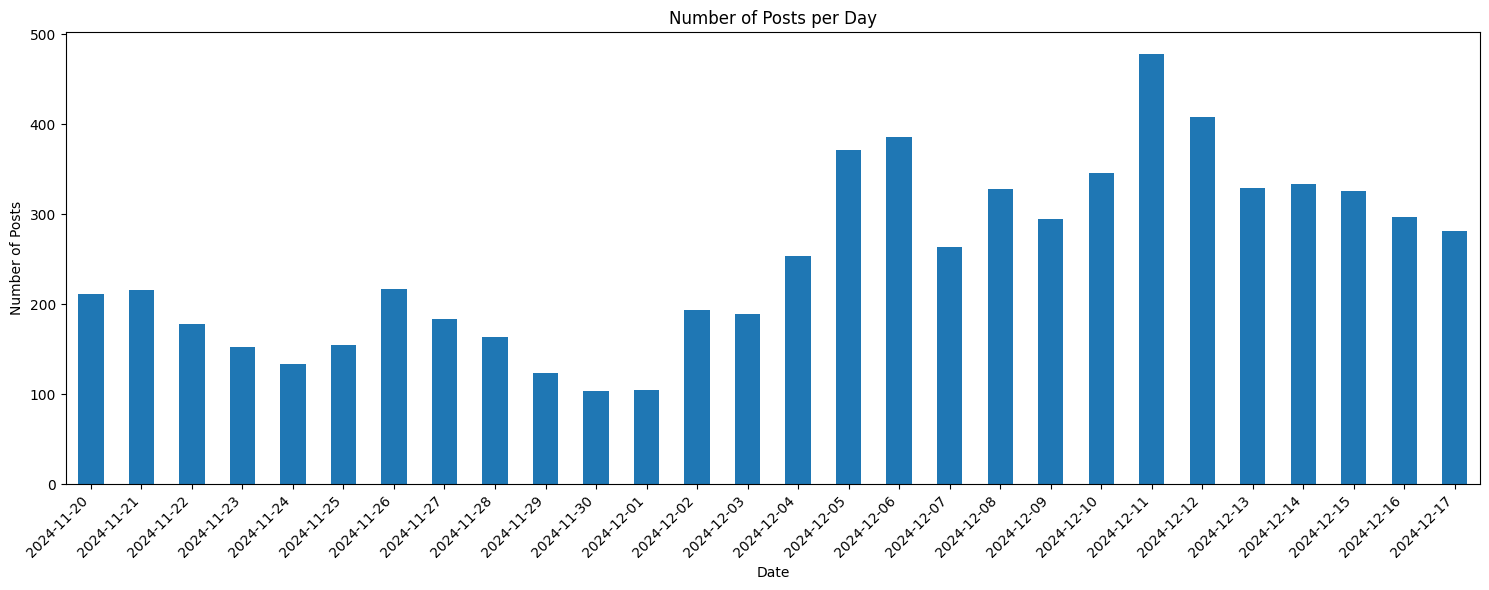

In [52]:
plt.figure(figsize=(15,6))
date_counts.plot(kind='bar')

plt.title('Number of Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

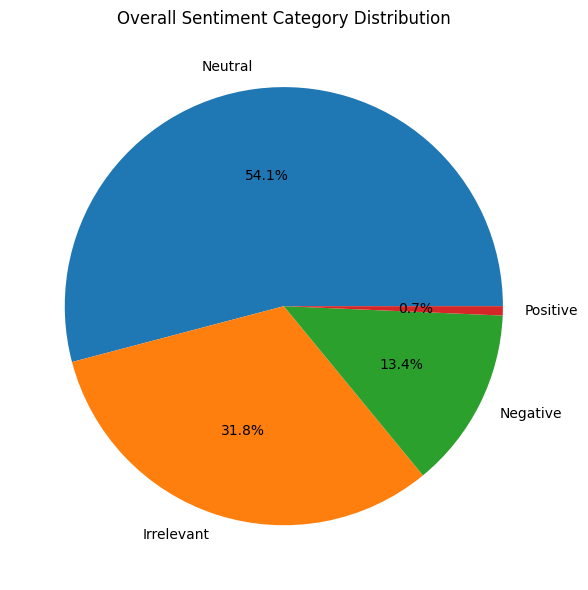

In [53]:
total_category_dist = df['sentiment_category'].value_counts(normalize=True) * 100
plt.figure(figsize=(8,6))
total_category_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overall Sentiment Category Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [54]:
category_stats = df.groupby('sentiment_category').agg({
    'sentiment_score': ['count', 'mean'],
    'Text': 'count'
})
print(category_stats)

                   sentiment_score        Text
                             count  mean count
sentiment_category                            
Irrelevant                    2235 -99.0  2235
Negative                       938  -1.0   938
Neutral                       3797   0.0  3797
Positive                        48   1.0    48


#### Daily Category Analysis

In [55]:
daily_category_freq = df.groupby(['Date', 'sentiment_category']).size().unstack(fill_value=0)

In [56]:
daily_category_freq

sentiment_category,Irrelevant,Negative,Neutral,Positive
Date,,,,
2024-11-20,67,18,125,1
2024-11-21,70,27,116,3
2024-11-22,63,19,95,1
2024-11-23,56,17,79,0
2024-11-24,47,6,81,0
2024-11-25,51,21,83,0
2024-11-26,54,16,147,0
2024-11-27,57,23,102,2
2024-11-28,41,30,91,1


In [57]:
cleaned_daily_category_freq = daily_category_freq.drop(columns = 'Irrelevant')

In [58]:
cleaned_daily_category_freq

sentiment_category,Negative,Neutral,Positive
Date,,,
2024-11-20,18,125,1
2024-11-21,27,116,3
2024-11-22,19,95,1
2024-11-23,17,79,0
2024-11-24,6,81,0
2024-11-25,21,83,0
2024-11-26,16,147,0
2024-11-27,23,102,2
2024-11-28,30,91,1


In [59]:
daily_category_freq_pct = cleaned_daily_category_freq.div(cleaned_daily_category_freq.sum(axis=1), axis=0) * 100

In [60]:
daily_category_freq_pct

sentiment_category,Negative,Neutral,Positive
Date,,,
2024-11-20,12.500000,86.805556,0.694444
2024-11-21,18.493151,79.452055,2.054795
2024-11-22,16.521739,82.608696,0.869565
2024-11-23,17.708333,82.291667,0.000000
2024-11-24,6.896552,93.103448,0.000000
2024-11-25,20.192308,79.807692,0.000000
2024-11-26,9.815951,90.184049,0.000000
2024-11-27,18.110236,80.314961,1.574803
2024-11-28,24.590164,74.590164,0.819672


##### Linear Regression as a Quasi-T-Test Approach

In [61]:
# pip install statsmodels

In [62]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [63]:
event_date = "2024-12-04"

In [73]:
# If daily_category_freq_pct is a MultiIndex DataFrame
# Reset the index to turn Date into a column
daily_category_pct_reset = daily_category_freq_pct.reset_index()

# Create DataFrame for regression
regression_df = pd.DataFrame({
    'Date': daily_category_pct_reset['Date'],
    'dummy': (pd.to_datetime(daily_category_pct_reset['Date']) >= pd.to_datetime(event_date)).astype(int),
    'frequency': daily_category_pct_reset['Negative']  # Or whichever category you're analyzing
})

# Prepare for regression
X_lr = regression_df['dummy']
y_lr = regression_df['frequency']

# Add constant for intercept
X_lr = sm.add_constant(X_lr)

# Fit the model
model = sm.OLS(y_lr, X_lr).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              frequency   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     16.66
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           0.000378
Time:                        20:01:37   Log-Likelihood:                -76.850
No. Observations:                  28   AIC:                             157.7
Df Residuals:                      26   BIC:                             160.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5180      1.044     14.861      0.0

##### Daily Sentiment Category Frequency (%)

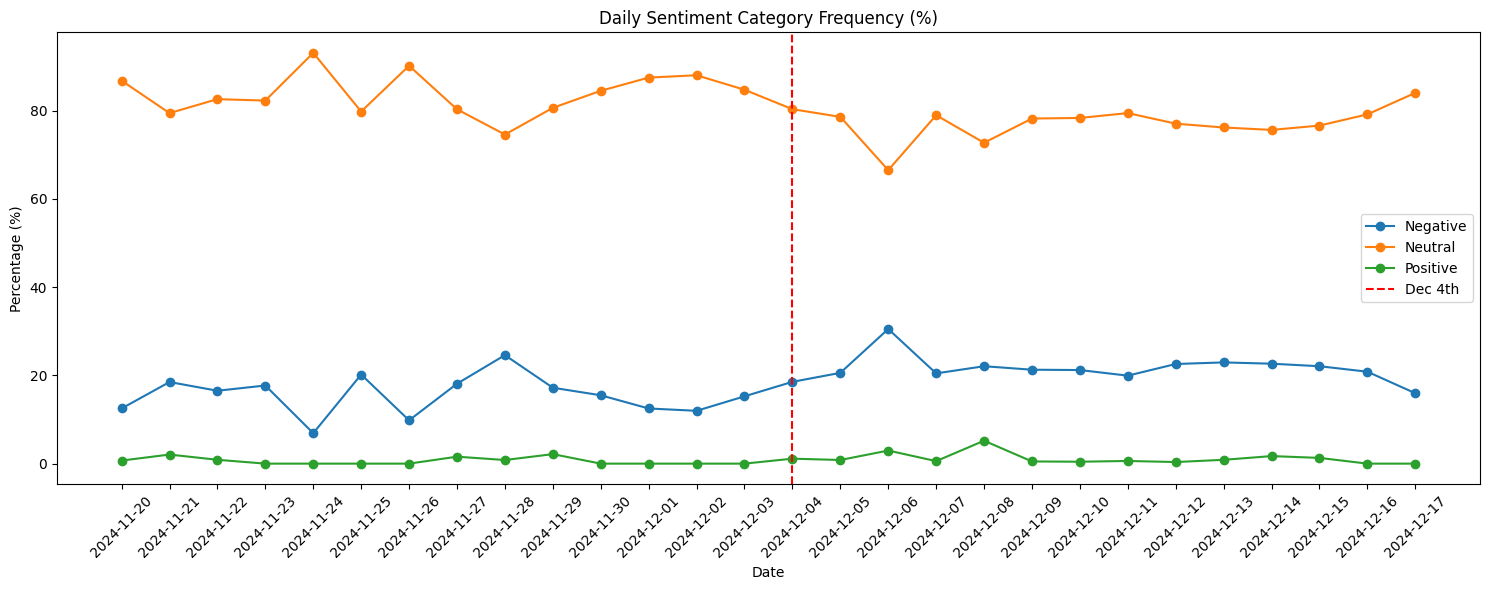

In [104]:
plt.figure(figsize=(15,6))
for category in daily_category_freq_pct.columns:
    plt.plot(daily_category_freq_pct.index, daily_category_freq_pct[category], label=category, marker='o')

plt.axvline(x="2024-12-04", color='red', linestyle='--', label='Dec 4th')

plt.title('Daily Sentiment Category Frequency (%)')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Daily Neutral Sentiment Category Frequency (%)

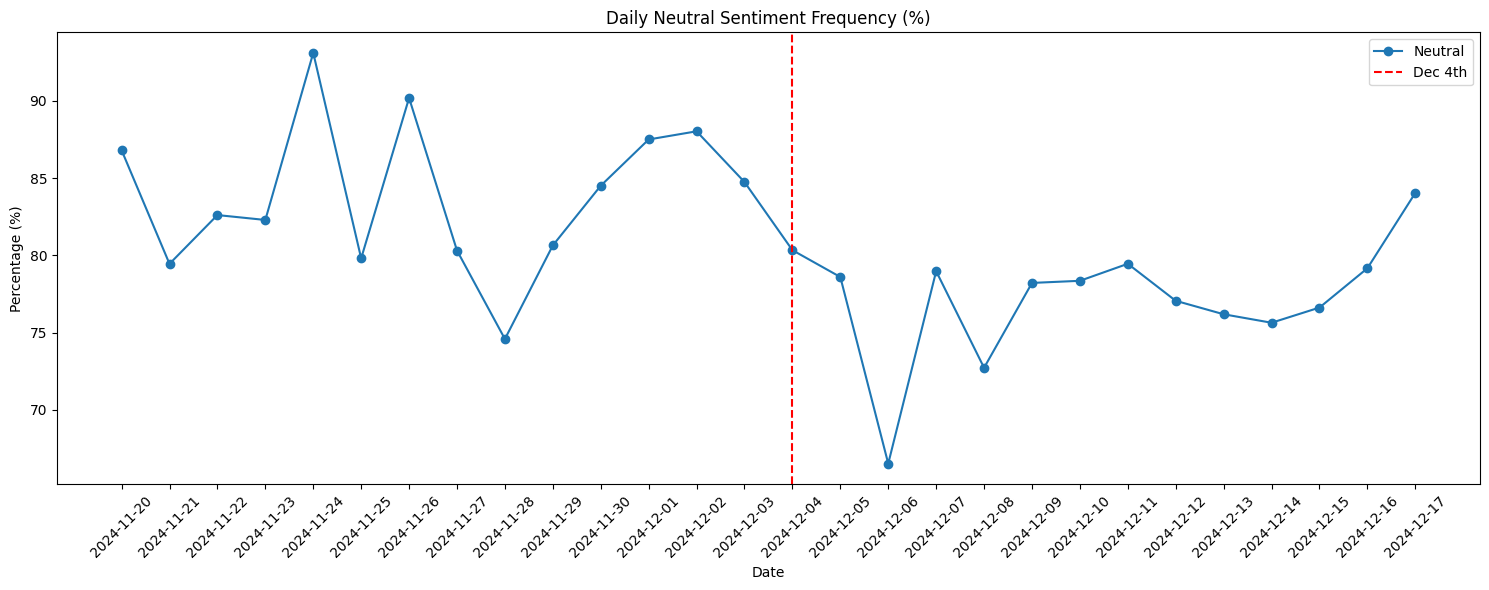

In [105]:
plt.figure(figsize=(15,6))
plt.plot(daily_category_freq_pct.index, daily_category_freq_pct['Neutral'], label= 'Neutral', marker='o')
plt.axvline(x="2024-12-04", color='red', linestyle='--', label='Dec 4th')
plt.title('Daily Neutral Sentiment Frequency (%)')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Daily Positive Sentiment Category Frequency (%)

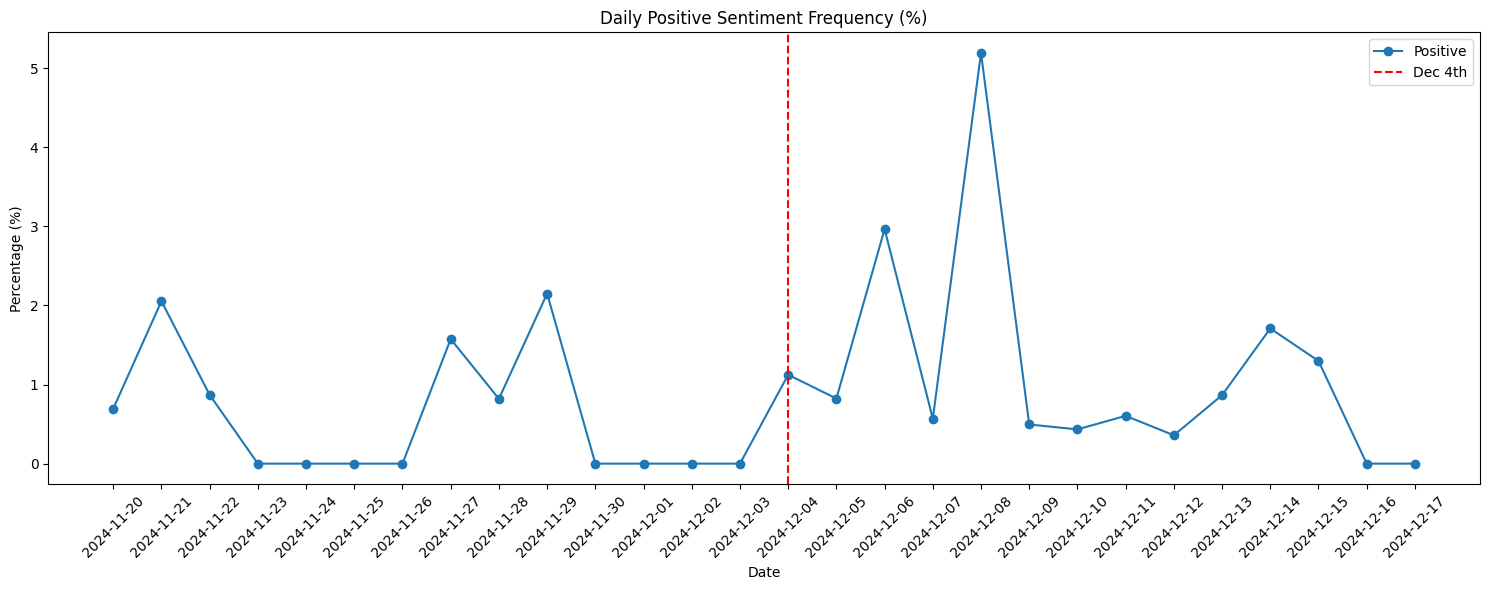

In [106]:
plt.figure(figsize=(15,6))
plt.plot(daily_category_freq_pct.index, daily_category_freq_pct['Positive'], label= 'Positive', marker='o')

plt.title('Daily Positive Sentiment Frequency (%)')
plt.axvline(x="2024-12-04", color='red', linestyle='--', label='Dec 4th')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Daily Negative Sentiment Category Frequency (%)

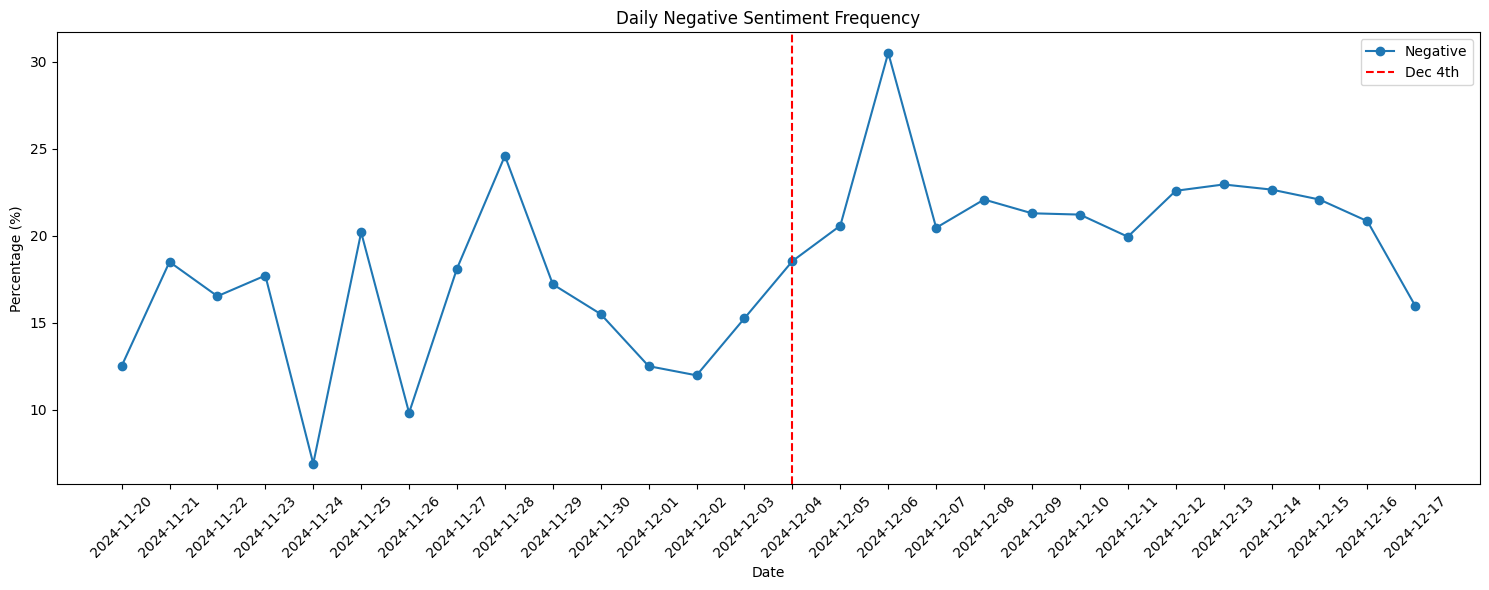

In [100]:
plt.figure(figsize=(15,6))
plt.plot(daily_category_freq_pct.index, daily_category_freq_pct['Negative'], label= 'Negative', marker='o')
plt.axvline(x="2024-12-04", color='red', linestyle='--', label='Dec 4th')
plt.title('Daily Negative Sentiment Frequency')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()